<a href="https://colab.research.google.com/github/LaDiosaNegra/Kristal_Main/blob/main/Travel_Aggregator_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
bookings = pd.read_csv('Bookings.csv')
sessions = pd.read_csv('Sessions.csv')

In [ ]:
bookings.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4


In [ ]:
sessions.head()

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN


In [ ]:
bookings.isnull().sum()

,0
customer_id,0
booking_id,0
from_city,0
from_country,0
to_city,0
to_country,0
booking_time,0
device_type_used,0
INR_Amount,0
service_name,0


In [ ]:
sessions.isnull().sum()

,0
session_id,0
search_id,0
search_time,0
session_starting_time,0
booking_id,1131


In [ ]:
bookings.drop_duplicates(inplace = True)
sessions.drop_duplicates(inplace = True)

In [ ]:
# Merge the datasets using booking_id as the key
merged_df = pd.merge(bookings, sessions, on="booking_id", how="left")

In [ ]:
merged_df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,session_id,search_id,search_time,session_starting_time
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8,session_231,search_439,2020-02-05T16:10:42.982Z,2020-02-05T16:00:20.320Z
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5,session_146,search_1304,2018-11-21T08:15:39.448Z,2018-11-21T07:30:07Z
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0,session_202,search_186,2019-12-16T22:51:29.184Z,2019-12-16T22:45:33Z
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,session_239,search_539,2021-10-29T12:12:15Z,2021-10-29T10:52:23.691Z
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,session_312,search_546,2020-08-11T16:02:32Z,2020-08-11T16:02:20Z


In [ ]:
# convert search_time to datetime, handling invalid formats
merged_df['search_time'] = pd.to_datetime(merged_df['search_time'], errors='coerce')



In [ ]:
merged_df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,session_id,search_id,search_time,session_starting_time
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8,session_231,search_439,2020-02-05 16:10:42.982000+00:00,2020-02-05T16:00:20.320Z
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5,session_146,search_1304,2018-11-21 08:15:39.448000+00:00,2018-11-21T07:30:07Z
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0,session_202,search_186,2019-12-16 22:51:29.184000+00:00,2019-12-16T22:45:33Z
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,session_239,search_539,NaT,2021-10-29T10:52:23.691Z
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,session_312,search_546,NaT,2020-08-11T16:02:20Z


In [ ]:
# check the sum of null values in each column
null_values = merged_df.isna().sum()
null_values

,0
customer_id,0
booking_id,0
from_city,0
from_country,0
to_city,0
to_country,0
booking_time,0
device_type_used,0
INR_Amount,0
service_name,0


In [ ]:
# drop rows with invalid search_time
merged_df = merged_df.dropna(subset=['search_time'])

In [ ]:
# check the sum of null values in each column after dropping null values
null_values = merged_df.isna().sum()
null_values

,0
customer_id,0
booking_id,0
from_city,0
from_country,0
to_city,0
to_country,0
booking_time,0
device_type_used,0
INR_Amount,0
service_name,0


In [ ]:
# extract date
merged_df['search_date'] = merged_df['search_time'].dt.date


<ipython-input-19-18328d716a01>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['search_date'] = merged_df['search_time'].dt.date


In [ ]:
# extract day of the week
merged_df['search_day_of_week'] = merged_df['search_time'].dt.day_name()


<ipython-input-20-d8586756a34c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['search_day_of_week'] = merged_df['search_time'].dt.day_name()


In [ ]:
merged_df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,session_id,search_id,search_time,session_starting_time,search_date,search_day_of_week
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8,session_231,search_439,2020-02-05 16:10:42.982000+00:00,2020-02-05T16:00:20.320Z,2020-02-05,Wednesday
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5,session_146,search_1304,2018-11-21 08:15:39.448000+00:00,2018-11-21T07:30:07Z,2018-11-21,Wednesday
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0,session_202,search_186,2019-12-16 22:51:29.184000+00:00,2019-12-16T22:45:33Z,2019-12-16,Monday
9,customer_150,booking_289,Delhi,India,Hamburg,Germany,2018-09-25T18:29:22Z,Desktop,47974.93,YATRA,1.0,17.0,6275.7,session_113,search_112,2018-09-25 18:25:59.574000+00:00,2018-09-25T18:14:03.336Z,2018-09-25,Tuesday
10,customer_111,booking_141,Gurgaon,India,Berlin,Germany,2019-10-10T19:53:03Z,Desktop,28788.00,YATRA,1.0,8.0,6008.3,session_66,search_1125,2019-10-10 19:46:16.950000+00:00,2019-10-10T19:45:33.134Z,2019-10-10,Thursday


In [ ]:
merged_df.columns

Index(['customer_id', 'booking_id', 'from_city', 'from_country', 'to_city',
       'to_country', 'booking_time', 'device_type_used', 'INR_Amount',
       'service_name', 'no_of_passengers', 'days_to_departure', 'distance_km',
       'session_id', 'search_id', 'search_time', 'session_starting_time',
       'search_date', 'search_day_of_week'],
      dtype='object')

In [ ]:
#step 2: calclate oBSR(Overall Booking to Search Ratio)

# group by search_date and aggregate relevant metrics
grouped_info = merged_df.groupby('search_date').agg(
    num_bookings=('booking_id', 'nunique'),
    num_searches=('search_id', 'nunique'),
    num_customers=('customer_id', 'nunique')
    ).reset_index()



In [ ]:
grouped_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   search_date    128 non-null    object
 1   num_bookings   128 non-null    int64 
 2   num_searches   128 non-null    int64 
 3   num_customers  128 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 4.1+ KB


In [ ]:
# Calculate oBSR (num_bookings divided by num_searches)
grouped_info['oBSR'] = grouped_info['num_bookings'] / grouped_info['num_searches']

In [ ]:
grouped_info[['num_bookings', 'num_searches', 'oBSR']].head()

,num_bookings,num_searches,oBSR
0,1,1,1.0
1,2,2,1.0
2,2,2,1.0
3,1,1,1.0
4,1,1,1.0


In [ ]:
# convert search_date to datetime for time series analysis
grouped_info['search_date'] = pd.to_datetime(grouped_info['search_date'])

grouped_info.head()

,search_date,num_bookings,num_searches,num_customers,oBSR
0,2018-09-04,1,1,1,1.0
1,2018-09-11,2,2,2,1.0
2,2018-09-21,2,2,2,1.0
3,2018-09-23,1,1,1,1.0
4,2018-09-24,1,1,1,1.0


In [ ]:
# extract month names
grouped_info['month_of_year'] = grouped_info['search_date'].dt.month_name()

In [ ]:
grouped_info.head()

,search_date,num_bookings,num_searches,num_customers,oBSR,month_of_year
0,2018-09-04,1,1,1,1.0,September
1,2018-09-11,2,2,2,1.0,September
2,2018-09-21,2,2,2,1.0,September
3,2018-09-23,1,1,1,1.0,September
4,2018-09-24,1,1,1,1.0,September


In [ ]:
# Step 3a: Calculate average oBSR for each month
avg_obsr_by_month = grouped_info.groupby('month_of_year')['oBSR'].mean().sort_values()

avg_obsr_by_month_reset = avg_obsr_by_month.reset_index()
avg_obsr_by_month_reset


,month_of_year,oBSR
0,August,1.0
1,December,1.0
2,February,1.0
3,January,1.0
4,July,1.0
5,June,1.0
6,March,1.0
7,November,1.0
8,October,1.0
9,September,1.0


In [ ]:
grouped_info.columns


Index(['search_date', 'num_bookings', 'num_searches', 'num_customers', 'oBSR',
       'month_of_year'],
      dtype='object')

In [ ]:
merged_df['search_time'] = pd.to_datetime(merged_df['search_time'], errors='coerce')

<ipython-input-42-8f7c609f4caa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['search_time'] = pd.to_datetime(merged_df['search_time'], errors='coerce')


In [ ]:
# ensure search_time is in datetime format
merged_df['search_day_of_week'] = merged_df['search_time'].dt.day_name()


<ipython-input-43-30a7a5ccdcf6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['search_day_of_week'] = merged_df['search_time'].dt.day_name()


In [ ]:
grouped_info = merged_df.groupby(['search_date', 'search_day_of_week']).agg(
    num_bookings=('booking_id', 'nunique'),
    num_searches=('search_id', 'nunique'),
    num_customers=('customer_id', 'nunique'),
    oBSR=('booking_id', lambda x: len(x) / len(merged_df['search_id']))  # Calculate oBSR
).reset_index()



In [ ]:
# Step 3b: calculate average oBSR for each day of the week

avg_obsr_by_day = grouped_info.groupby('search_day_of_week')['oBSR'].mean().sort_values()
avg_obsr_by_day_reset = avg_obsr_by_day.reset_index()
avg_obsr_by_day_reset

,search_day_of_week,oBSR
0,Wednesday,0.006206
1,Saturday,0.007012
2,Thursday,0.007092
3,Sunday,0.007365
4,Monday,0.007852
5,Tuesday,0.008777
6,Friday,0.010306


In [ ]:
merged_df[['search_time', 'search_day_of_week']].head()

,search_time,search_day_of_week
0,2020-02-05 16:10:42.982000+00:00,Wednesday
1,2018-11-21 08:15:39.448000+00:00,Wednesday
2,2019-12-16 22:51:29.184000+00:00,Monday
9,2018-09-25 18:25:59.574000+00:00,Tuesday
10,2019-10-10 19:46:16.950000+00:00,Thursday


In [ ]:
grouped_info.columns

Index(['search_date', 'search_day_of_week', 'num_bookings', 'num_searches',
       'num_customers', 'oBSR'],
      dtype='object')

In [ ]:
# step 3c: Plot a time series of oBSR
fig = px.line(
    grouped_info,
    x='search_date',
    y='oBSR',
    title='oBSR Time Series',
    labels={'search_date': 'Date', 'oBSR': 'Booking to Search Ratio'}
)
fig.show()

In [ ]:
# count distinct values
distinct_counts = {
    'Distinct Bookings': bookings['booking_id'].nunique(),
    'Distinct Sessions': sessions['session_id'].nunique(),
    'Distinct Searches': sessions['search_id'].nunique()
}

distinct_counts


{'Distinct Bookings': 339, 'Distinct Sessions': 331, 'Distinct Searches': 1360}

In [ ]:
# group by session_id and count bookings
sessions_with_multiple_bookings = sessions.groupby('session_id')['booking_id'].nunique()
multi_booking_sessions = (sessions_with_multiple_bookings > 1).sum()

multi_booking_sessions


10

In [ ]:
# add day of the week to the bookings dataset
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'])
bookings['day_of_week'] = bookings['booking_time'].dt.day_name()




In [ ]:
# count bookings by day of the week
bookings_by_day = bookings['day_of_week'].value_counts()
bookings_by_day


,count
day_of_week,
Thursday,65
Tuesday,59
Monday,51
Friday,51
Saturday,44
Sunday,35
Wednesday,34


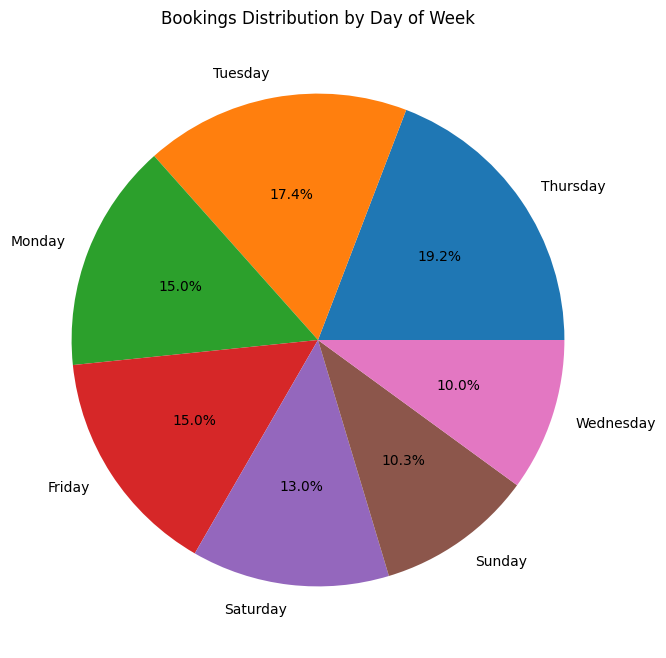

In [ ]:

# Plot a pie chart
bookings_by_day.plot.pie(autopct='%1.1f%%', figsize=(8, 8), title='Bookings Distribution by Day of Week')
plt.ylabel('')
plt.show()

In [ ]:
# Group by service_name and calculate metrics
service_metrics = bookings.groupby('service_name').agg(
    total_bookings=('booking_id', 'nunique'),
    total_gbv=('INR_Amount', 'sum')
)

service_metrics


,total_bookings,total_gbv
service_name,,
GOIBIBO,186,5897637.97
MMT,48,665669.08
YATRA,105,3378702.13


In [ ]:
# Filter customers with more than one booking
frequent_customers = bookings.groupby('customer_id').filter(lambda x: len(x) > 1)

frequent_customers.head()


,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,day_of_week
6,customer_28,booking_129,Kolkata,India,Gurgaon,India,2022-02-16 15:50:27+00:00,Desktop,13442.4,GOIBIBO,1.0,13.0,1310.7,Wednesday
7,customer_217,booking_18,Bhubaneswar,India,Durlaga,India,2021-09-10 19:09:12+00:00,Desktop,4352.0,GOIBIBO,2.0,47.0,260.5,Friday
13,customer_282,booking_212,Indore,India,Mumbai,India,2021-10-16 07:56:59+00:00,IOS,4725.6,GOIBIBO,1.0,0.0,506.2,Saturday
16,customer_179,booking_218,Gurgaon,India,Port Blair,India,2020-01-12 17:34:59+00:00,Desktop,17804.8,MMT,2.0,35.0,2486.8,Sunday
24,customer_179,booking_157,Mumbai,India,Jaipur,India,2020-01-23 13:58:39+00:00,Desktop,6953.6,GOIBIBO,1.0,15.0,921.8,Thursday


In [ ]:
# Find the most booked route
most_booked_route = frequent_customers.groupby(['from_city', 'to_city'])['booking_id'].count().idxmax()
most_booked_route

('Gurgaon', 'Roissy-en-France')

In [ ]:
# Calculate average days to departure for cities with at least 5 bookings
top_departure_cities = (
    bookings.groupby('from_city')
    .filter(lambda x: len(x) >= 5)
    .groupby('from_city')['days_to_departure']
    .mean()
    .sort_values(ascending=False)
    .head(3)
)

top_departure_cities

,days_to_departure
from_city,
Bālāpur,46.166667
Devanhalli,29.583333
Chennai,26.187500


In [ ]:
# Calculate correlations for numerical columns
correlation_matrix = bookings[['days_to_departure', 'distance_km', 'INR_Amount']].corr()

correlation_matrix




,days_to_departure,distance_km,INR_Amount
days_to_departure,1.000000,0.216972,0.284534
distance_km,0.216972,1.000000,0.623565
INR_Amount,0.284534,0.623565,1.000000


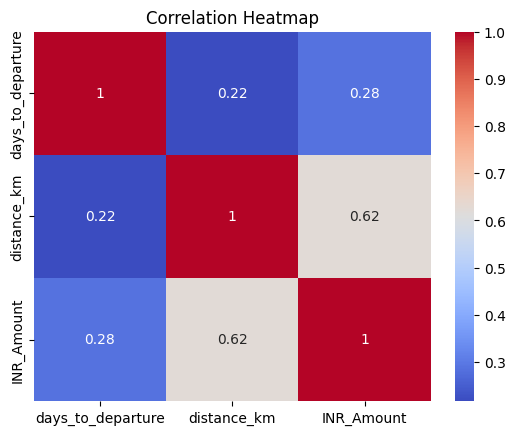

In [ ]:
# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



In [ ]:
# Report maximum correlation pair
max_corr_pair = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()

max_corr_pair[1:]

distance_km        INR_Amount     0.623565
days_to_departure  INR_Amount     0.284534
                   distance_km    0.216972
dtype: float64

In [ ]:
# Group by service_name and device_type
most_used_device = (
    bookings.groupby(['service_name', 'device_type_used'])['booking_id']
    .count()
    .reset_index()
    .sort_values(by=['service_name', 'booking_id'], ascending=[True, False])
    .drop_duplicates(subset=['service_name'])
)

most_used_device


,service_name,device_type_used,booking_id
2,GOIBIBO,IOS,70
5,MMT,Desktop,30
9,YATRA,Desktop,51


In [ ]:
# Extract quarter and year
bookings['quarter'] = bookings['booking_time'].dt.to_period('Q')

# Group by quarter and device type
quarterly_trends = bookings.groupby(['quarter', 'device_type_used'])['booking_id'].count().reset_index()

quarterly_trends.head()


<ipython-input-74-8ae05755769d>:2: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



,quarter,device_type_used,booking_id
0,2018Q3,Android,3
1,2018Q3,Desktop,6
2,2018Q3,MobileWeb,2
3,2018Q3,Tablet,1
4,2018Q4,Android,3


In [ ]:
quarterly_trends['quarter'] = quarterly_trends['quarter'].astype(str)

fig = px.line(
    quarterly_trends,
    x='quarter',
    y='booking_id',
    color='device_type_used',
    title='Quarterly Booking Trends by Device Type'
)
fig.show()




In [ ]:
grouped_info.columns


Index(['search_date', 'search_day_of_week', 'num_bookings', 'num_searches',
       'num_customers', 'oBSR'],
      dtype='object')

In [ ]:
#convert search_date to Datetime

grouped_info['search_date'] = pd.to_datetime(grouped_info['search_date'], errors='coerce')



In [ ]:
# Extract month_of_year
grouped_info['month_of_year'] = grouped_info['search_date'].dt.month_name()


In [ ]:
grouped_info[['search_date', 'month_of_year']].head()


,search_date,month_of_year
0,2018-09-04,September
1,2018-09-11,September
2,2018-09-21,September
3,2018-09-23,September
4,2018-09-24,September


In [ ]:
# Group by search_date and calculate oBSR
merged_df['search_time'] = pd.to_datetime(merged_df['search_time'])
merged_df['search_date'] = merged_df['search_time'].dt.date


In [ ]:

grouped_info = merged_df.groupby('search_date').agg(
    num_bookings=('booking_id', 'nunique'),
    num_searches=('search_id', 'nunique')
).reset_index()


grouped_info['oBSR'] = grouped_info['num_bookings'] / grouped_info['num_searches']


In [ ]:

# Average oBSR by month
grouped_info['month'] = pd.to_datetime(grouped_info['search_date']).dt.month_name()
avg_obsr_by_month = grouped_info.groupby('month')['oBSR'].mean()

avg_obsr_by_month



,oBSR
month,
August,1.0
December,1.0
February,1.0
January,1.0
July,1.0
June,1.0
March,1.0
November,1.0
October,1.0


In [ ]:
# Average oBSR by day of week
grouped_info['day_of_week'] = pd.to_datetime(grouped_info['search_date']).dt.day_name()
avg_obsr_by_day = grouped_info.groupby('day_of_week')['oBSR'].mean()
avg_obsr_by_day



,oBSR
day_of_week,
Friday,1.0
Monday,1.0
Saturday,1.0
Sunday,1.0
Thursday,1.0
Tuesday,1.0
Wednesday,1.0


In [ ]:
grouped_info[['search_date', 'oBSR']].head(10)


,search_date,oBSR
0,2018-09-04,1.0
1,2018-09-11,1.0
2,2018-09-21,1.0
3,2018-09-23,1.0
4,2018-09-24,1.0
5,2018-09-25,1.0
6,2018-09-29,1.0
7,2018-10-02,1.0
8,2018-10-04,1.0
9,2018-10-06,1.0


In [ ]:
grouped_info['oBSR'].unique()


array([1.])

In [ ]:
import plotly.express as px

fig = px.line(
    grouped_info,
    x='search_date',
    y='oBSR',
    title='oBSR Time Series',
    labels={'search_date': 'Date', 'oBSR': 'Booking to Search Ratio'},
)
fig.show()
